In [56]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2

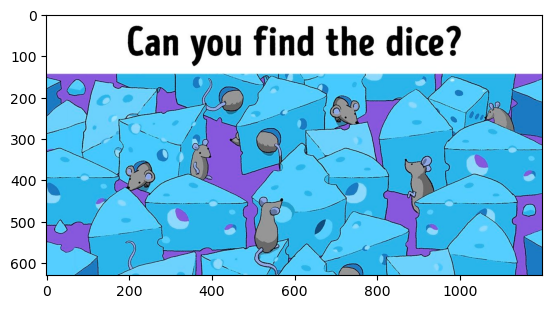

In [57]:
image = cv2.imread(r"C:\Users\ASUS\Desktop\UET\Image Processing\Finding-Counting-ImageSet\Counting\mouse.jpg")
plt.imshow(image)

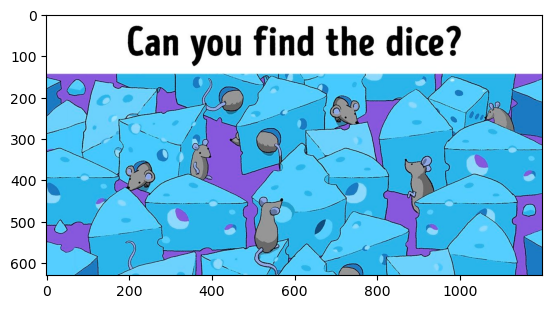

In [58]:
output_image = image.copy()
plt.imshow(output_image)

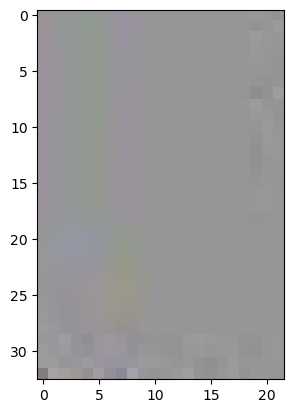

In [59]:
template = cv2.imread(r'C:\Users\ASUS\Desktop\UET\Image Processing\Finding-Counting-ImageSet\Counting\mouse\skin.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
template_rgb = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)
plt.imshow(template_rgb)

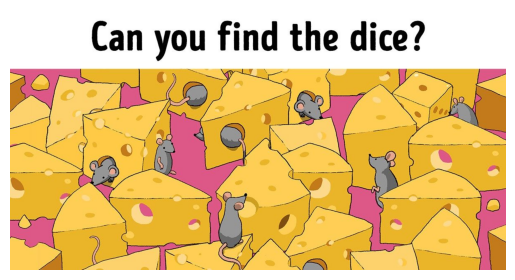

In [60]:
w, h = template.shape[1], template.shape[0]

image_channels = cv2.split(image)
template_channels = cv2.split(template)

result_channels = []

for (img_chan, temp_chan) in zip(image_channels, template_channels):
    result = cv2.matchTemplate(img_chan, temp_chan, cv2.TM_CCOEFF_NORMED)
    result_channels.append(result)

combined_result = np.mean(result_channels, axis=0)

# Set a threshold and find locations where matching is above the threshold
threshold = 0.5
loc = np.where(combined_result >= threshold)

# Draw rectangles around detected matches
for pt in zip(*loc[::-1]):
    cv2.rectangle(image, pt, (pt[0] + w, pt[1] + h), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()